___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Decision Trees and Random Forests in Python

<b>Description</b>

The kyphosis data frame has 81 rows representing data on 81 children who have had corrective spinal surgery. The outcome Kyphosis is a binary variable, the other three variables (columns) are numeric.

<b>Arguments</b>

<Table>
 <tr><td><i>Kyphosis</i>	- a factor telling whether a postoperative deformity (kyphosis) is "present" or "absent" .</td></tr>
 <tr><td><i>Age</i>	- the age of the child in months.</td></tr>
 <tr><td><i>Number</i>	- the number of vertebrae involved in the operation.</td></tr>
 <tr><td><i>Start</i> - the beginning of the range of vertebrae involved in the operation.</td></tr>
</table>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import os
print(os.getcwd())
os.chdir('/Users/dineshchandgeetharavichandran/Desktop/Dinesh/Project/Data-Science/Machine Learning Programs/Decision Trees and Random Forest') 

/Users/dineshchandgeetharavichandran/Desktop/Dinesh/Project/Data-Science/Machine Learning Programs


## Get the Data

In [3]:
df = pd.read_csv('kyphosis.csv')

In [4]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


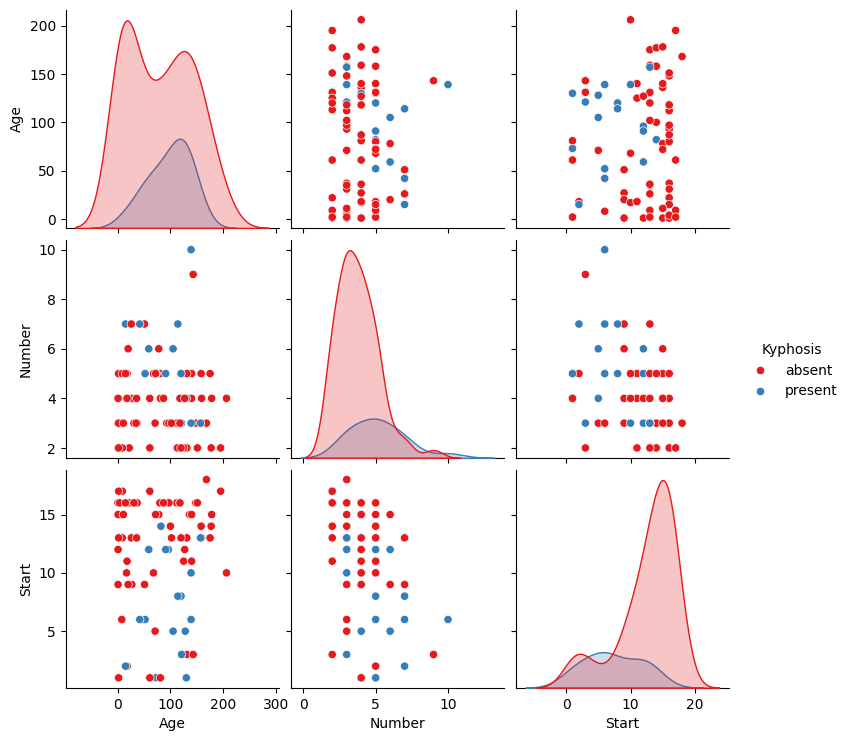

In [6]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

## Train Test Split


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Decision Trees



In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
dtree = DecisionTreeClassifier()

In [12]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Prediction and Evaluation 



In [13]:
predictions = dtree.predict(X_test)

In [14]:
from sklearn.metrics import classification_report,confusion_matrix

In [15]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.80      0.89      0.84        18
     present       0.60      0.43      0.50         7

    accuracy                           0.76        25
   macro avg       0.70      0.66      0.67        25
weighted avg       0.74      0.76      0.75        25



In [16]:
print(confusion_matrix(y_test,predictions))

[[16  2]
 [ 4  3]]


## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

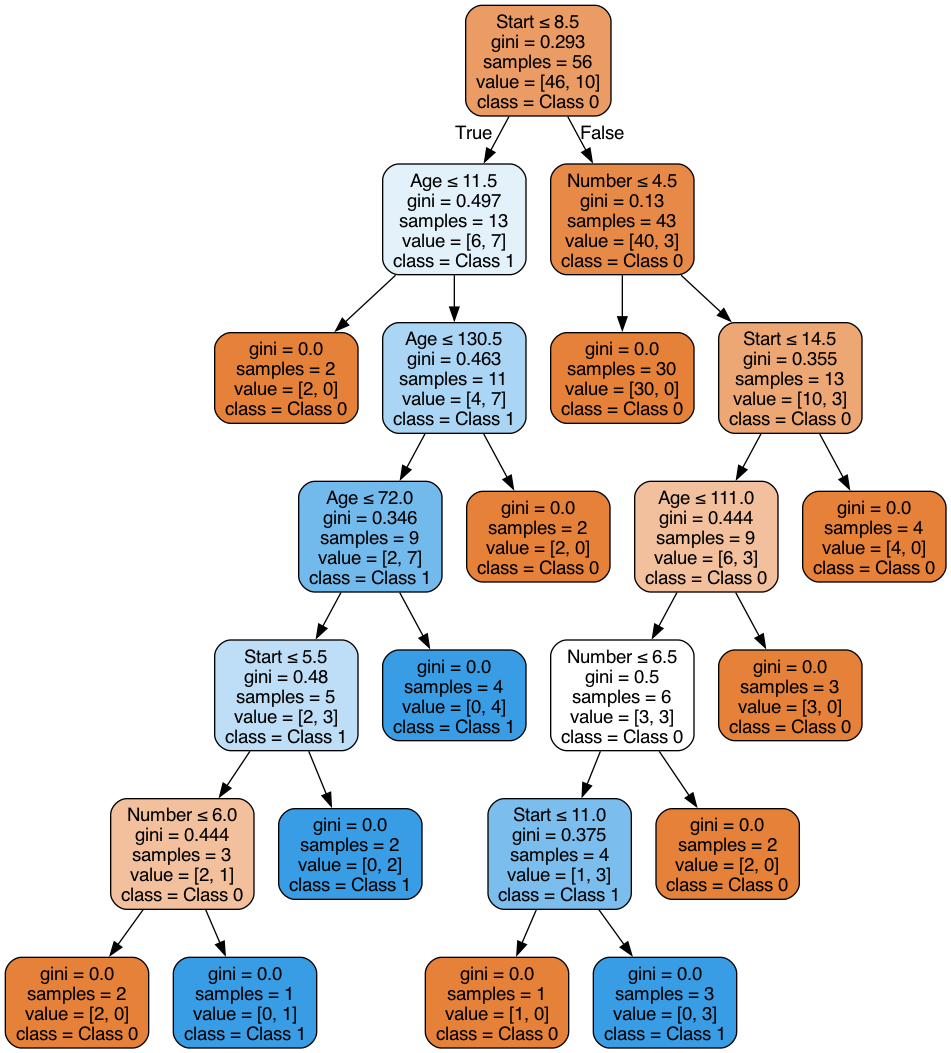

In [25]:
from io import StringIO
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image


dot_data = StringIO()
export_graphviz(
    dtree,
    out_file=dot_data,
    feature_names=X.columns,
    class_names=["Class 0", "Class 1"],
    filled=True,
    rounded=True,
    special_characters=True
)

# Convert DOT data to graph
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_png("tree.png")

# Display the image
Image(filename="tree.png")

In [46]:
# dot_data = StringIO()  
# export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

# graph = pydot.graph_from_dot_data(dot_data.getvalue())  
# Image(graph[0].create_png())  

## Random Forests

Now let's compare the decision tree model to a random forest.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [76]:
rfc_pred = rfc.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,rfc_pred))

[[20  0]
 [ 3  2]]


In [50]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.90      0.86      0.88        21
     present       0.40      0.50      0.44         4

    accuracy                           0.80        25
   macro avg       0.65      0.68      0.66        25
weighted avg       0.82      0.80      0.81        25

